<a href="https://colab.research.google.com/github/mazzeratziii/ML/blob/main/Lab_5MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/drive/MyDrive/ColabFiles/lab5.csv")

print("Первые 5 строк:\n", df.head())
print("Информация о датасете:")
print(df.info())
print("Описание:\n", df.describe())

Первые 5 строк:
        Date  Employees
0  1/1/1990     1064.5
1  2/1/1990     1074.5
2  3/1/1990     1090.0
3  4/1/1990     1097.4
4  5/1/1990     1108.7
Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB
None
Описание:
          Employees
count   348.000000
mean   1452.506897
std     256.604914
min    1064.500000
25%    1238.050000
50%    1436.200000
75%    1586.300000
max    2022.100000


In [ ]:
# Преобразование столбца с датой
if 'Date' in df.columns:
  date_col = [col for col in df.columns if col.lower() in ['date']][0]
  value_col = [col for col in df.columns if col.lower() in ['employees']]

# Преобразование в datetime
  if df[date_col].dtype == 'object':
    df[date_col] = pd.to_datetime(df[date_col])

  df.set_index(date_col, inplace = True)

  print(f"Временной ряд с {df.index.min()} по {df.index.max()}")

Временной ряд с 1990-01-01 00:00:00 по 2018-12-01 00:00:00


Используем столбец для анализа: Employees
Доступные столбцы: ['Employees', 'year', 'month']
Диапазон дат: от 1990-01-01 00:00:00 до 2018-12-01 00:00:00


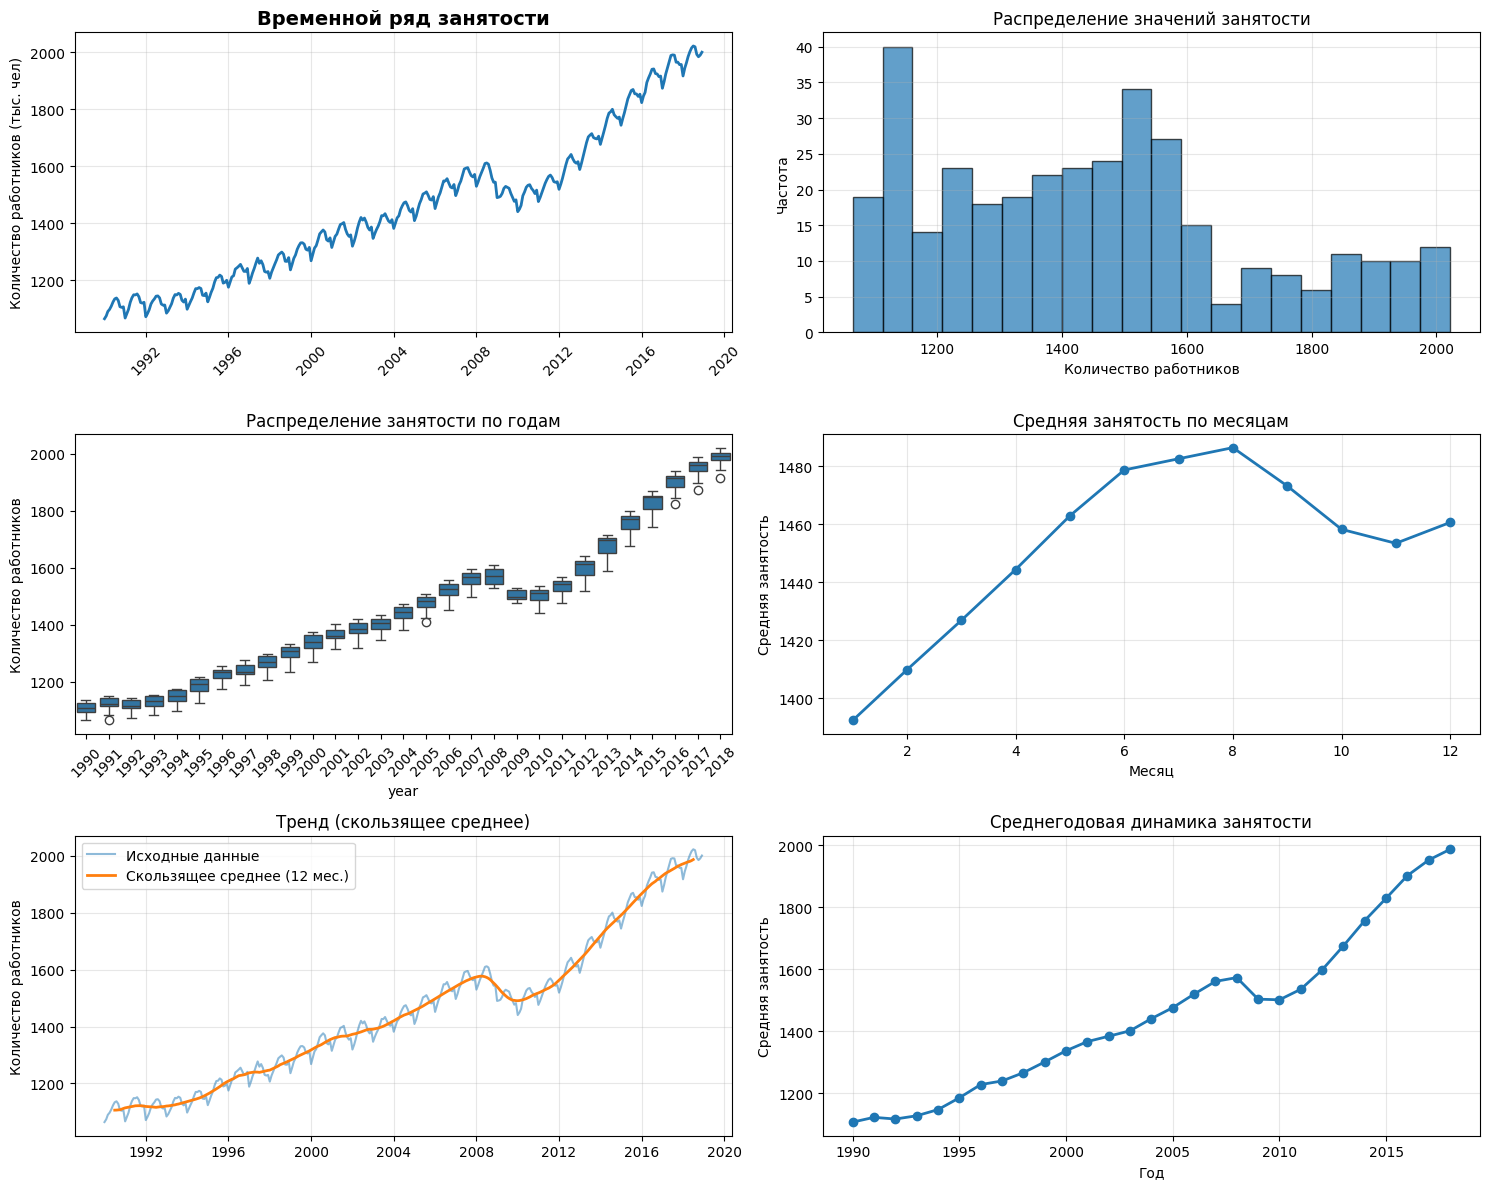

In [ ]:
if isinstance(value_col, list):
    data_column = value_col[0]
else:
    data_column = value_col

print(f"Используем столбец для анализа: {data_column}")

# Создаем столбцы year и month из индекса
df['year'] = df.index.year
df['month'] = df.index.month

print(f"Доступные столбцы: {df.columns.tolist()}")
print(f"Диапазон дат: от {df.index.min()} до {df.index.max()}")

# Исправленная визуализация
plt.figure(figsize=(15, 12))

# Основной график временного ряда
plt.subplot(3, 2, 1)
plt.plot(df.index, df[data_column], linewidth=2)
plt.title('Временной ряд занятости', fontsize=14, fontweight='bold')
plt.ylabel('Количество работников (тыс. чел)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Распределение данных
plt.subplot(3, 2, 2)
plt.hist(df[data_column], bins=20, alpha=0.7, edgecolor='black')
plt.title('Распределение значений занятости')
plt.xlabel('Количество работников')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

# Boxplot по годам
plt.subplot(3, 2, 3)
if len(df['year'].unique()) > 1:
    # Создаем данные для boxplot
    plot_data = df.reset_index()
    # Убедимся, что используем правильное имя столбца
    sns.boxplot(data=plot_data, x='year', y=data_column)
    plt.title('Распределение занятости по годам')
    plt.xticks(rotation=45)
    plt.ylabel('Количество работников')
else:
    plt.text(0.5, 0.5, 'Недостаточно лет для анализа',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Распределение по годам')

# Сезонность по месяцам
plt.subplot(3, 2, 4)
monthly_avg = df.groupby('month')[data_column].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2)
plt.title('Средняя занятость по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя занятость')
plt.grid(True, alpha=0.3)

# Скользящее среднее для выявления тренда
plt.subplot(3, 2, 5)
window_size = 12  # 12 месяцев для годового сглаживания
df['moving_avg'] = df[data_column].rolling(window=window_size, center=True).mean()
plt.plot(df.index, df[data_column], alpha=0.5, label='Исходные данные')
plt.plot(df.index, df['moving_avg'], linewidth=2, label=f'Скользящее среднее ({window_size} мес.)')
plt.title('Тренд (скользящее среднее)')
plt.ylabel('Количество работников')
plt.legend()
plt.grid(True, alpha=0.3)

# Изменение по годам
plt.subplot(3, 2, 6)
yearly_avg = df.groupby('year')[data_column].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
plt.title('Среднегодовая динамика занятости')
plt.xlabel('Год')
plt.ylabel('Средняя занятость')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


1. Сезонная декомпозиция временого ряда


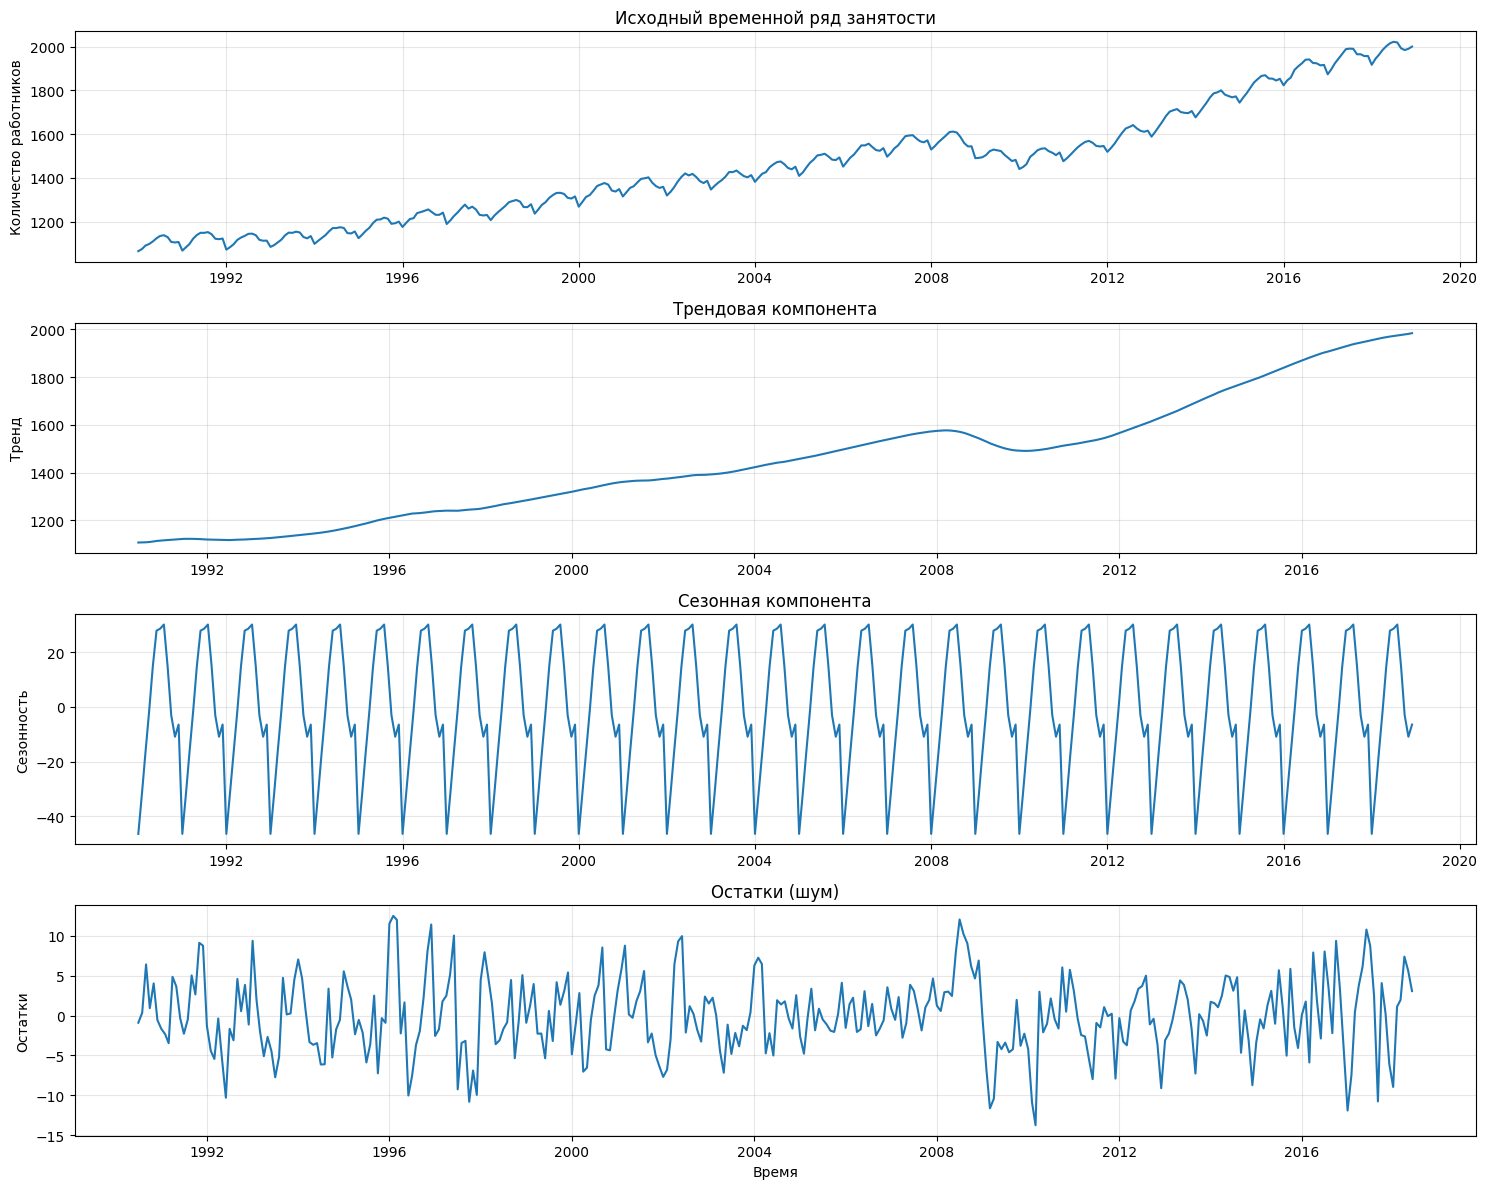


2. Анализ трендовой компоненты
Направление тренда: восходящий
Среднее изменение тренда в месяц: 2.61
Общее изменение за период: 877.85


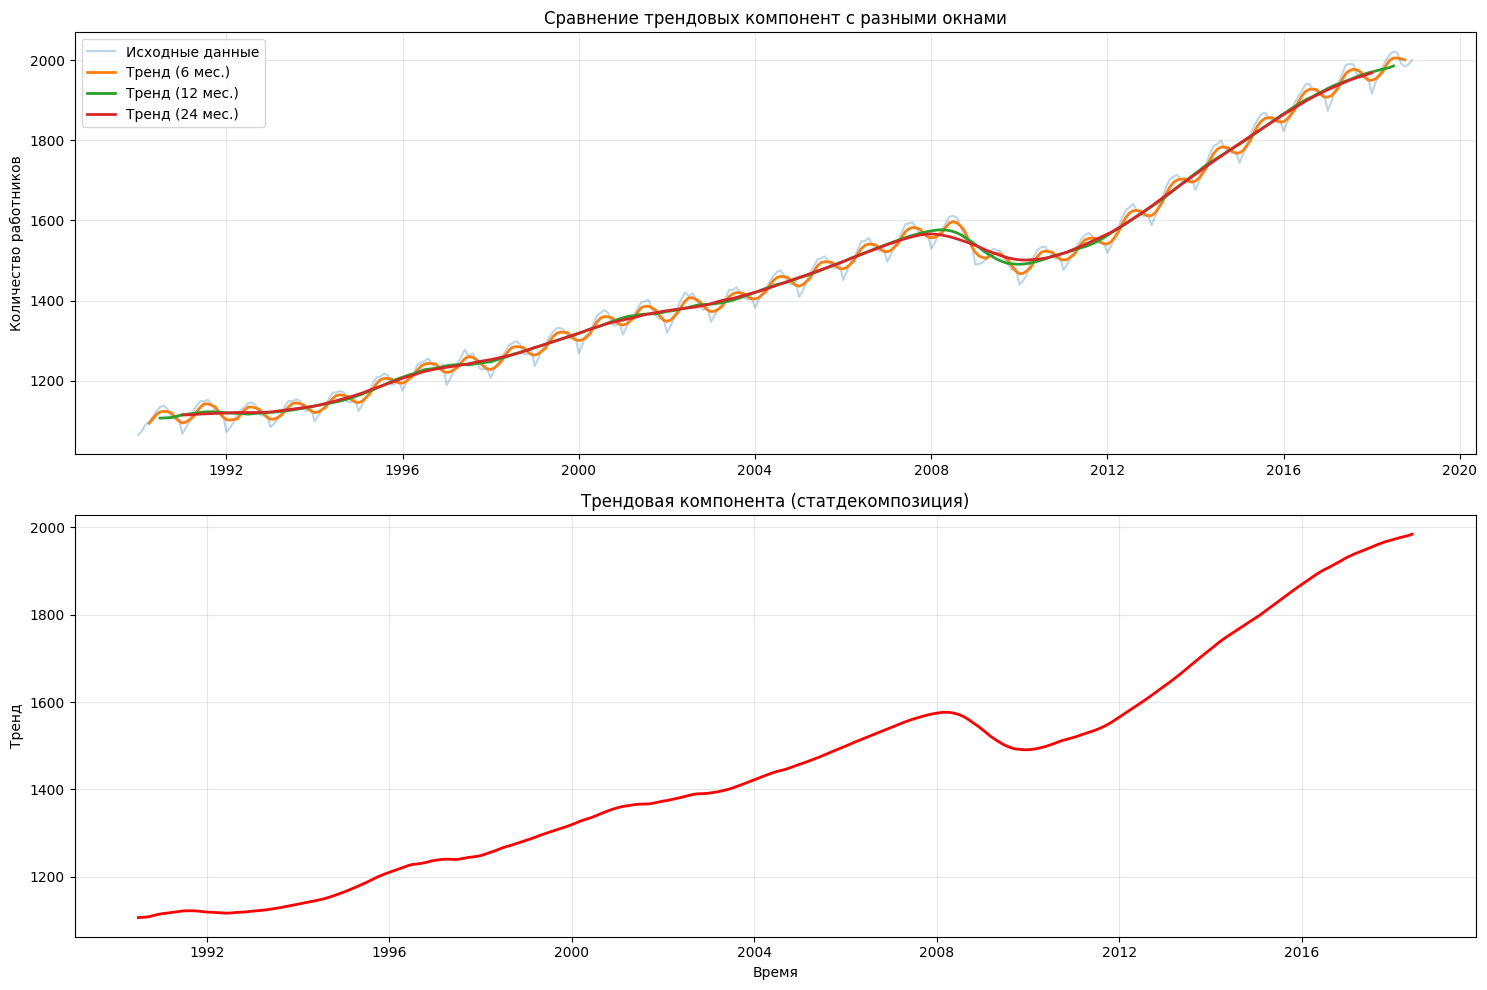


3. Анализ сезонной компоненты

Сезонные колебания по месяцам:
Месяц  1: -46.37
Месяц  2: -31.26
Месяц  3: -16.77
Месяц  4: -1.47
Месяц  5: +14.71
Месяц  6: +27.89
Месяц  7: +28.61
Месяц  8: +30.13
Месяц  9: +14.81
Месяц 10: -3.01
Месяц 11: -10.86
Месяц 12: -6.43

Пиковый месяц: 8 (сезонность: 30.13)
Низкий месяц: 1 (сезонность: -46.37)
Амплитуда сезонных колебаний: 76.50


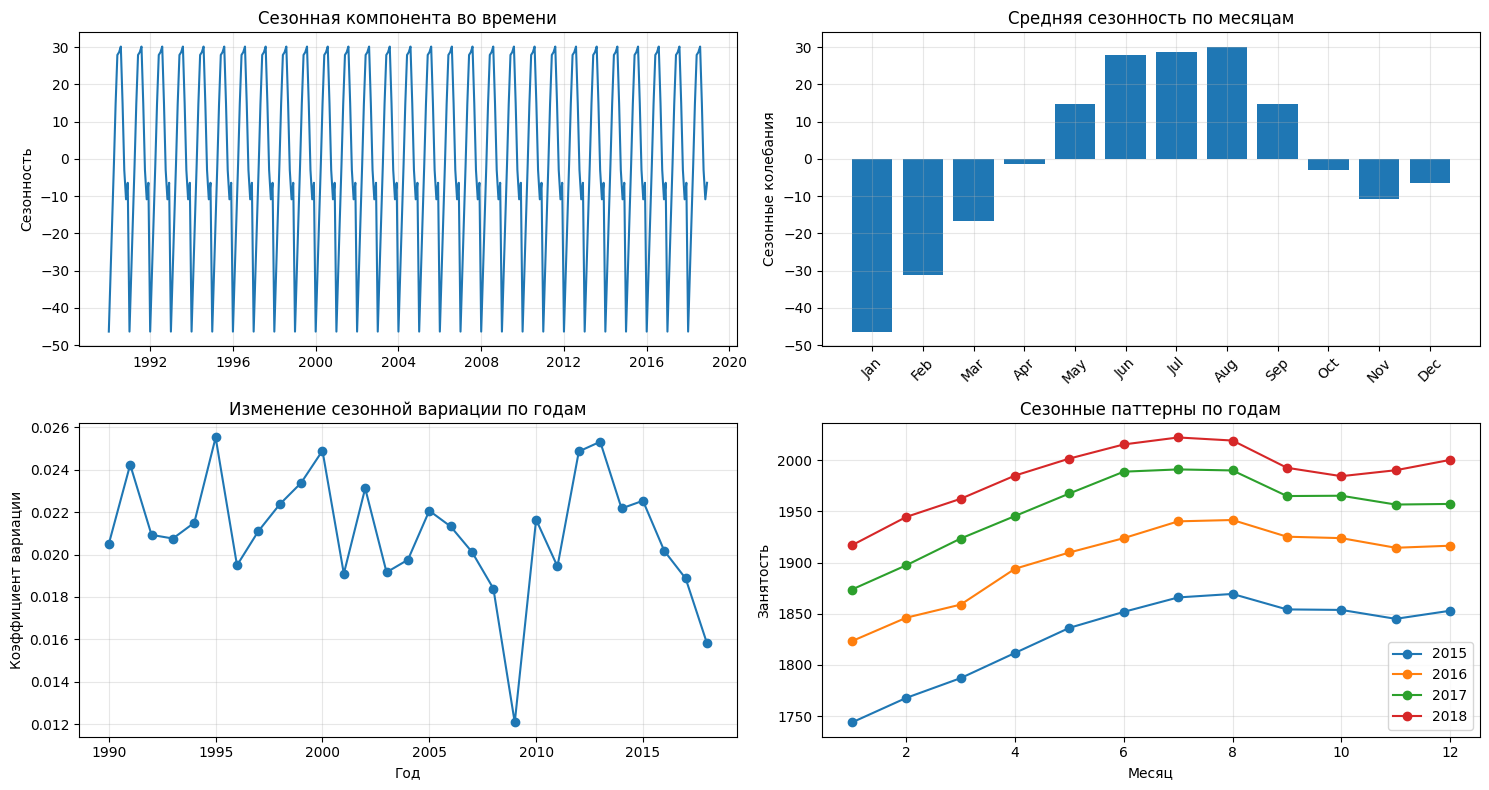


4. Выявление аномалий в данных
Аномалии по z-score (|z| > 3): 0 точек
Аномалии по методу IQR: 2 точек


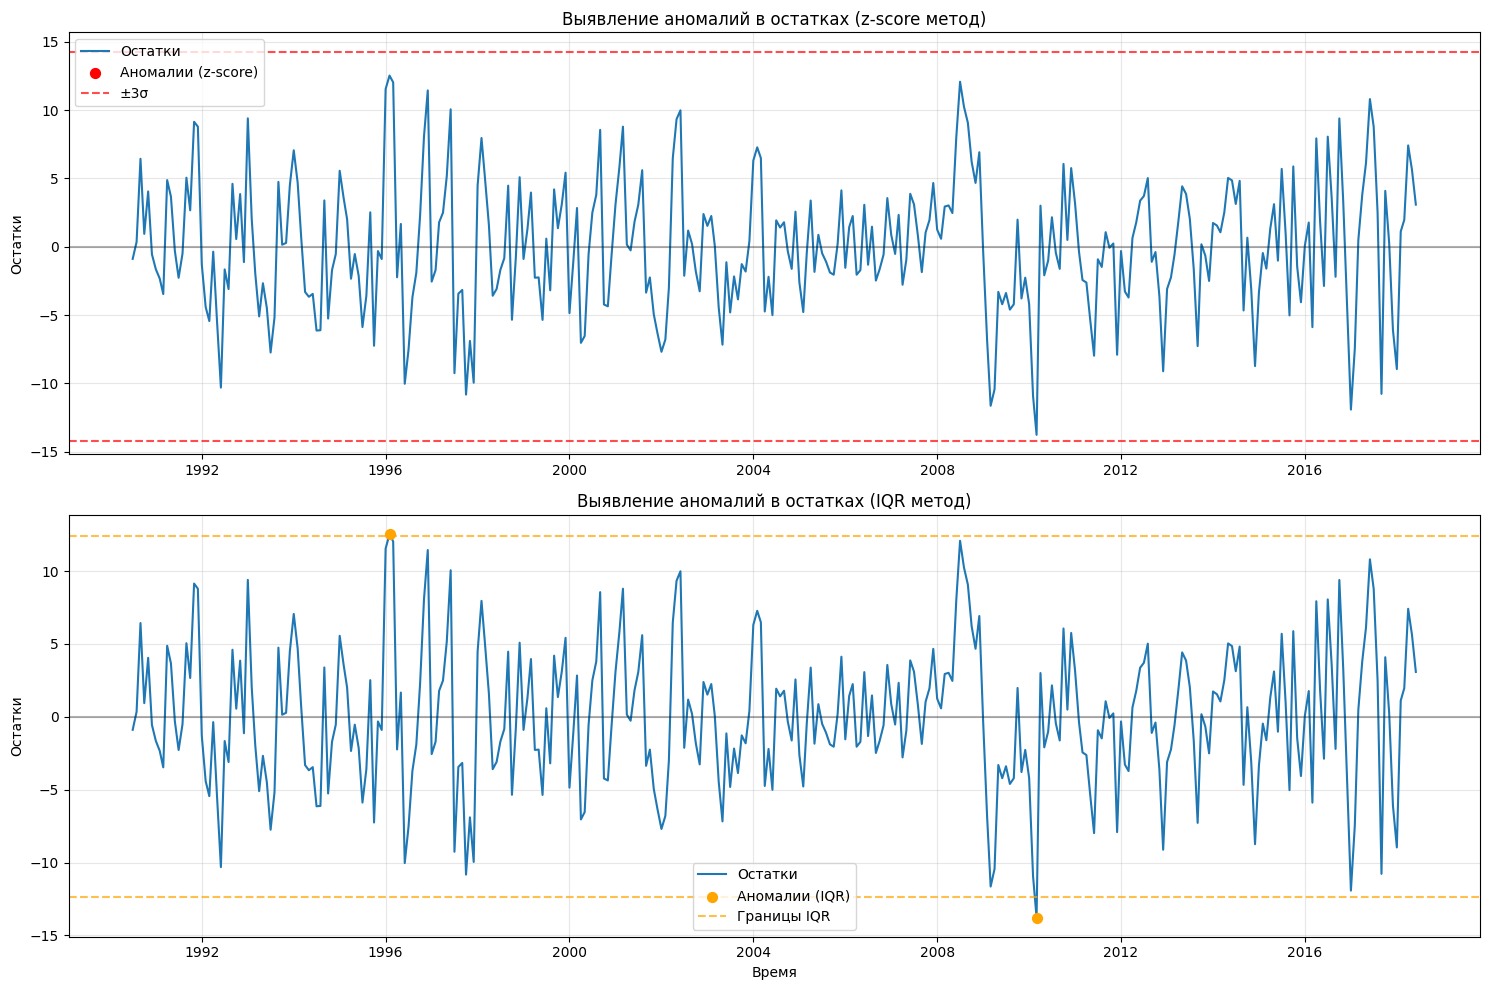


 Тренд:
Направление: восходящий
Среднемесячное изменение: 2.61
Общее изменение за период: 877.85

 Сезонность:
Пиковый месяц: 8 (Aug)
Низкий месяц: 1 (Jan)
Амплитуда колебаний: 76.50
Сезонный паттерн: Выраженный

 Аномалии:
Выявлено аномалий (z-score): 0
Выявлено аномалий (IQR): 2

 Общая характеристика ряда:
Коэффициент вариации: 17.7%
Общая волатильность: Средняя


In [ ]:
# Сезонная декомпозиция ряда
from statsmodels.tsa.seasonal import seasonal_decompose

print("\n1. Сезонная декомпозиция временого ряда")

# Выполняем декомпозицию
decomposition = seasonal_decompose(df[data_column], model='additive', period=12)

# Визуализация декомпозиции
plt.figure(figsize=(15, 12))

# Исходный ряд
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Исходный временной ряд занятости')
plt.ylabel('Количество работников')
plt.grid(True, alpha=0.3)

# Тренд
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Трендовая компонента')
plt.ylabel('Тренд')
plt.grid(True, alpha=0.3)

# Сезонность
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Сезонная компонента')
plt.ylabel('Сезонность')
plt.grid(True, alpha=0.3)

# Остатки
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Остатки (шум)')
plt.ylabel('Остатки')
plt.xlabel('Время')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Детальный анализ тренда
print("\n2. Анализ трендовой компоненты")

# Рассчитаем различные тренды
df['trend_ma_6'] = df[data_column].rolling(window=6, center=True).mean()
df['trend_ma_12'] = df[data_column].rolling(window=12, center=True).mean()
df['trend_ma_24'] = df[data_column].rolling(window=24, center=True).mean()

# Анализ направления тренда
trend_component = decomposition.trend.dropna()
if len(trend_component) > 1:
    trend_slope = (trend_component.iloc[-1] - trend_component.iloc[0]) / len(trend_component)
    trend_direction = "восходящий" if trend_slope > 0 else "нисходящий" if trend_slope < 0 else "стабильный"

    print(f"Направление тренда: {trend_direction}")
    print(f"Среднее изменение тренда в месяц: {trend_slope:.2f}")
    print(f"Общее изменение за период: {trend_component.iloc[-1] - trend_component.iloc[0]:.2f}")

# Визуализация различных трендов
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df.index, df[data_column], alpha=0.3, label='Исходные данные')
plt.plot(df.index, df['trend_ma_6'], label='Тренд (6 мес.)', linewidth=2)
plt.plot(df.index, df['trend_ma_12'], label='Тренд (12 мес.)', linewidth=2)
plt.plot(df.index, df['trend_ma_24'], label='Тренд (24 мес.)', linewidth=2)
plt.title('Сравнение трендовых компонент с разными окнами')
plt.ylabel('Количество работников')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(decomposition.trend, linewidth=2, color='red')
plt.title('Трендовая компонента (статдекомпозиция)')
plt.ylabel('Тренд')
plt.xlabel('Время')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#  Детальный анализ сезонности
print("\n3. Анализ сезонной компоненты")

# Анализ сезонности по месяцам
seasonal_component = decomposition.seasonal
monthly_seasonal = seasonal_component.groupby(seasonal_component.index.month).first()

print("\nСезонные колебания по месяцам:")
for month, value in monthly_seasonal.items():
    print(f"Месяц {month:2d}: {value:+.2f}")

# Определение пиковых и низких сезонов
peak_month = monthly_seasonal.idxmax()
low_month = monthly_seasonal.idxmin()
seasonal_amplitude = monthly_seasonal.max() - monthly_seasonal.min()

print(f"\nПиковый месяц: {peak_month} (сезонность: {monthly_seasonal[peak_month]:.2f})")
print(f"Низкий месяц: {low_month} (сезонность: {monthly_seasonal[low_month]:.2f})")
print(f"Амплитуда сезонных колебаний: {seasonal_amplitude:.2f}")

# Визуализация сезонности
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(seasonal_component)
plt.title('Сезонная компонента во времени')
plt.ylabel('Сезонность')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_seasonal.values)
plt.title('Средняя сезонность по месяцам')
plt.xticks(rotation=45)
plt.ylabel('Сезонные колебания')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Сезонность по годам (если данных достаточно)
if len(df['year'].unique()) > 3:
    seasonal_by_year = df.groupby('year')[data_column].std() / df.groupby('year')[data_column].mean()
    plt.plot(seasonal_by_year.index, seasonal_by_year.values, marker='o')
    plt.title('Изменение сезонной вариации по годам')
    plt.xlabel('Год')
    plt.ylabel('Коэффициент вариации')
    plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Сравнение сезонных паттернов разных лет
if len(df['year'].unique()) > 3:
    recent_years = sorted(df['year'].unique())[-4:]
    for year in recent_years:
        year_data = df[df['year'] == year]
        monthly_avg = year_data.groupby('month')[data_column].mean()
        plt.plot(monthly_avg.index, monthly_avg.values, label=str(year), marker='o')
    plt.title('Сезонные паттерны по годам')
    plt.xlabel('Месяц')
    plt.ylabel('Занятость')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Выявление аномалий
print("\n4. Выявление аномалий в данных")

from scipy import stats

# Метод 1: Использование z-score для остатков
residuals = decomposition.resid.dropna()
z_scores = np.abs(stats.zscore(residuals))
anomalies_z = residuals[z_scores > 3]

# Метод 2: Использование межквартильного размаха (IQR)
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
anomalies_iqr = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

print(f"Аномалии по z-score (|z| > 3): {len(anomalies_z)} точек")
print(f"Аномалии по методу IQR: {len(anomalies_iqr)} точек")

# Визуализация аномалий
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(residuals.index, residuals, label='Остатки')
plt.scatter(anomalies_z.index, anomalies_z, color='red', s=50, zorder=5, label='Аномалии (z-score)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=residuals.mean() + 3*residuals.std(), color='red', linestyle='--', alpha=0.7, label='±3σ')
plt.axhline(y=residuals.mean() - 3*residuals.std(), color='red', linestyle='--', alpha=0.7)
plt.title('Выявление аномалий в остатках (z-score метод)')
plt.ylabel('Остатки')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(residuals.index, residuals, label='Остатки')
plt.scatter(anomalies_iqr.index, anomalies_iqr, color='orange', s=50, zorder=5, label='Аномалии (IQR)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=upper_bound, color='orange', linestyle='--', alpha=0.7, label='Границы IQR')
plt.axhline(y=lower_bound, color='orange', linestyle='--', alpha=0.7)
plt.title('Выявление аномалий в остатках (IQR метод)')
plt.ylabel('Остатки')
plt.xlabel('Время')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сводный анализ и выводы
print("\n Тренд:")
if 'trend_slope' in locals():
    print(f"Направление: {trend_direction}")
    print(f"Среднемесячное изменение: {trend_slope:.2f}")
    print(f"Общее изменение за период: {trend_component.iloc[-1] - trend_component.iloc[0]:.2f}")

print("\n Сезонность:")
print(f"Пиковый месяц: {peak_month} ({months[peak_month-1]})")
print(f"Низкий месяц: {low_month} ({months[low_month-1]})")
print(f"Амплитуда колебаний: {seasonal_amplitude:.2f}")
print(f"Сезонный паттерн: {'Выраженный' if seasonal_amplitude > 10 else 'Умеренный' if seasonal_amplitude > 5 else 'Слабый'}")

print("\n Аномалии:")
print(f"Выявлено аномалий (z-score): {len(anomalies_z)}")
print(f"Выявлено аномалий (IQR): {len(anomalies_iqr)}")
if len(anomalies_z) > 0:
    print(f"   • Самые значительные аномалии:")
    for idx, value in anomalies_z.nlargest(3).items():
        print(f"     {idx.strftime('%Y-%m')}: {value:.2f}")

print("\n Общая характеристика ряда:")
volatility = df[data_column].std() / df[data_column].mean() * 100
print(f"Коэффициент вариации: {volatility:.1f}%")
print(f"Общая волатильность: {'Высокая' if volatility > 20 else 'Средняя' if volatility > 10 else 'Низкая'}")

#  Анализ влияния covid-19
if 2020 in df['year'].unique():
    print("\n влияние covid-19:")
    covid_period = df[(df['year'] == 2020) | (df['year'] == 2021)]
    if len(covid_period) > 0:
        pre_covid_avg = df[df['year'] == 2019][data_column].mean()
        covid_avg = covid_period[data_column].mean()
        impact = ((covid_avg - pre_covid_avg) / pre_covid_avg) * 100
        print(f"Изменение занятости в период пандемии: {impact:.1f}%")


1. Тестирование исходного временого ряда


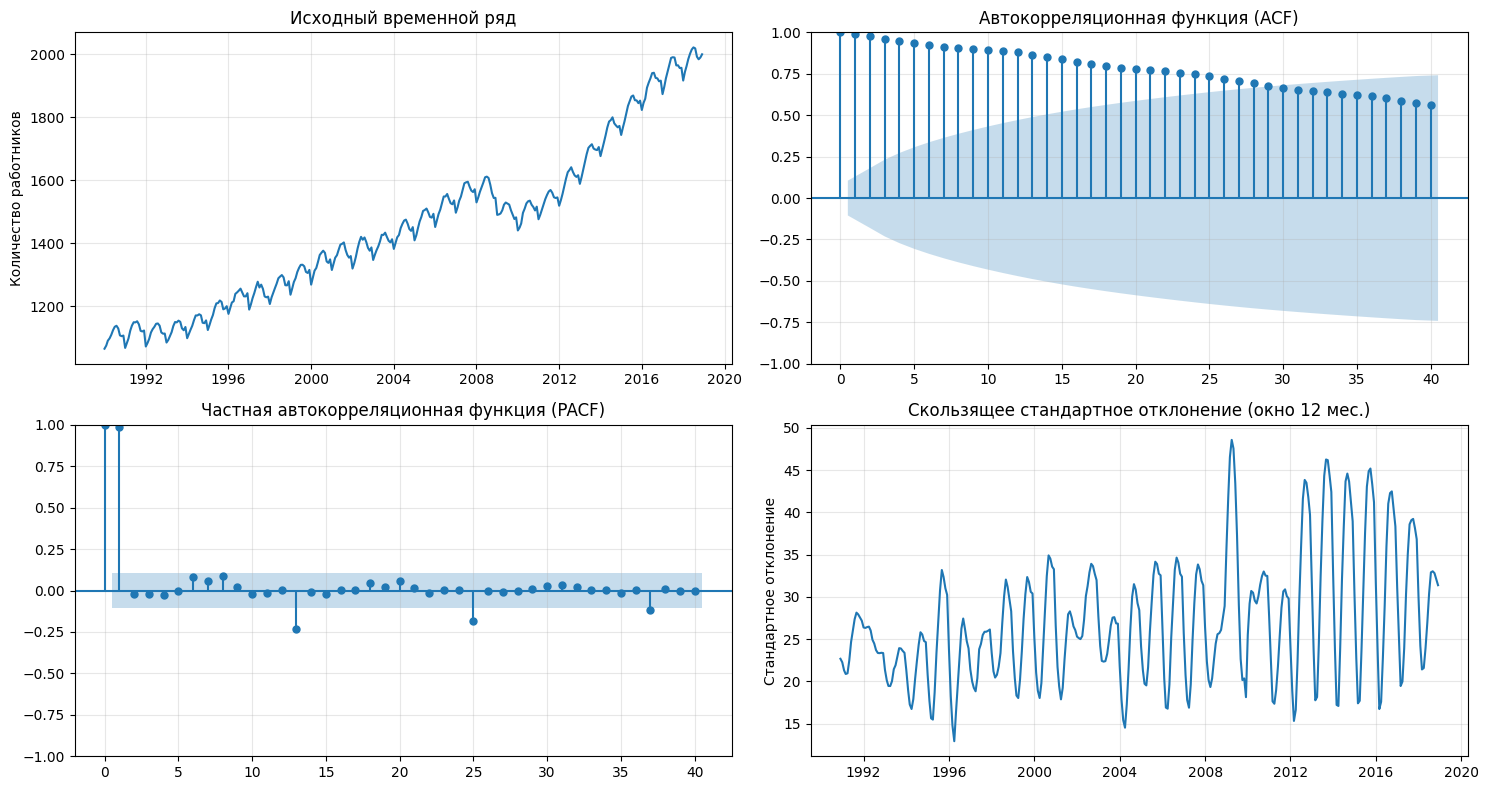


 Статические тесты исходного ряда:

--- ТЕСТ ДИКИ-ФУЛЛЕРА (ADF) ДЛЯ Исходный ряд ---
Статистика теста                0.901284
p-value                         0.993107
Количество лагов               17.000000
Количество наблюдений         330.000000
Критическое значение (1%)      -3.450322
Критическое значение (5%)      -2.870338
Критическое значение (10%)     -2.571458
dtype: float64
Исходный ряд нестационарен (p-value = 0.9931)

--- ТЕСТ KPSS ДЛЯ Исходный ряд ---
Статистика теста                2.811347
p-value                         0.010000
Количество лагов               11.000000
Критическое значение (10%)      0.347000
Критическое значение (5%)       0.463000
Критическое значение (2.5%)     0.574000
Критическое значение (1%)       0.739000
dtype: float64
Исходный ряд нестационарен (p-value = 0.0100)

 Результаты тестов для преобразованных рядов:

Первое дифференцирование:

--- ТЕСТ ДИКИ-ФУЛЛЕРА (ADF) ДЛЯ Первое дифференцирование ---
Статистика теста               -3.068279
p-val

/tmp/ipython-input-2973941766.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries.dropna(), regression='c', nlags='auto')
/tmp/ipython-input-2973941766.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries.dropna(), regression='c', nlags='auto')
/tmp/ipython-input-2973941766.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries.dropna(), regression='c', nlags='auto')
/tmp/ipython-input-2973941766.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than 

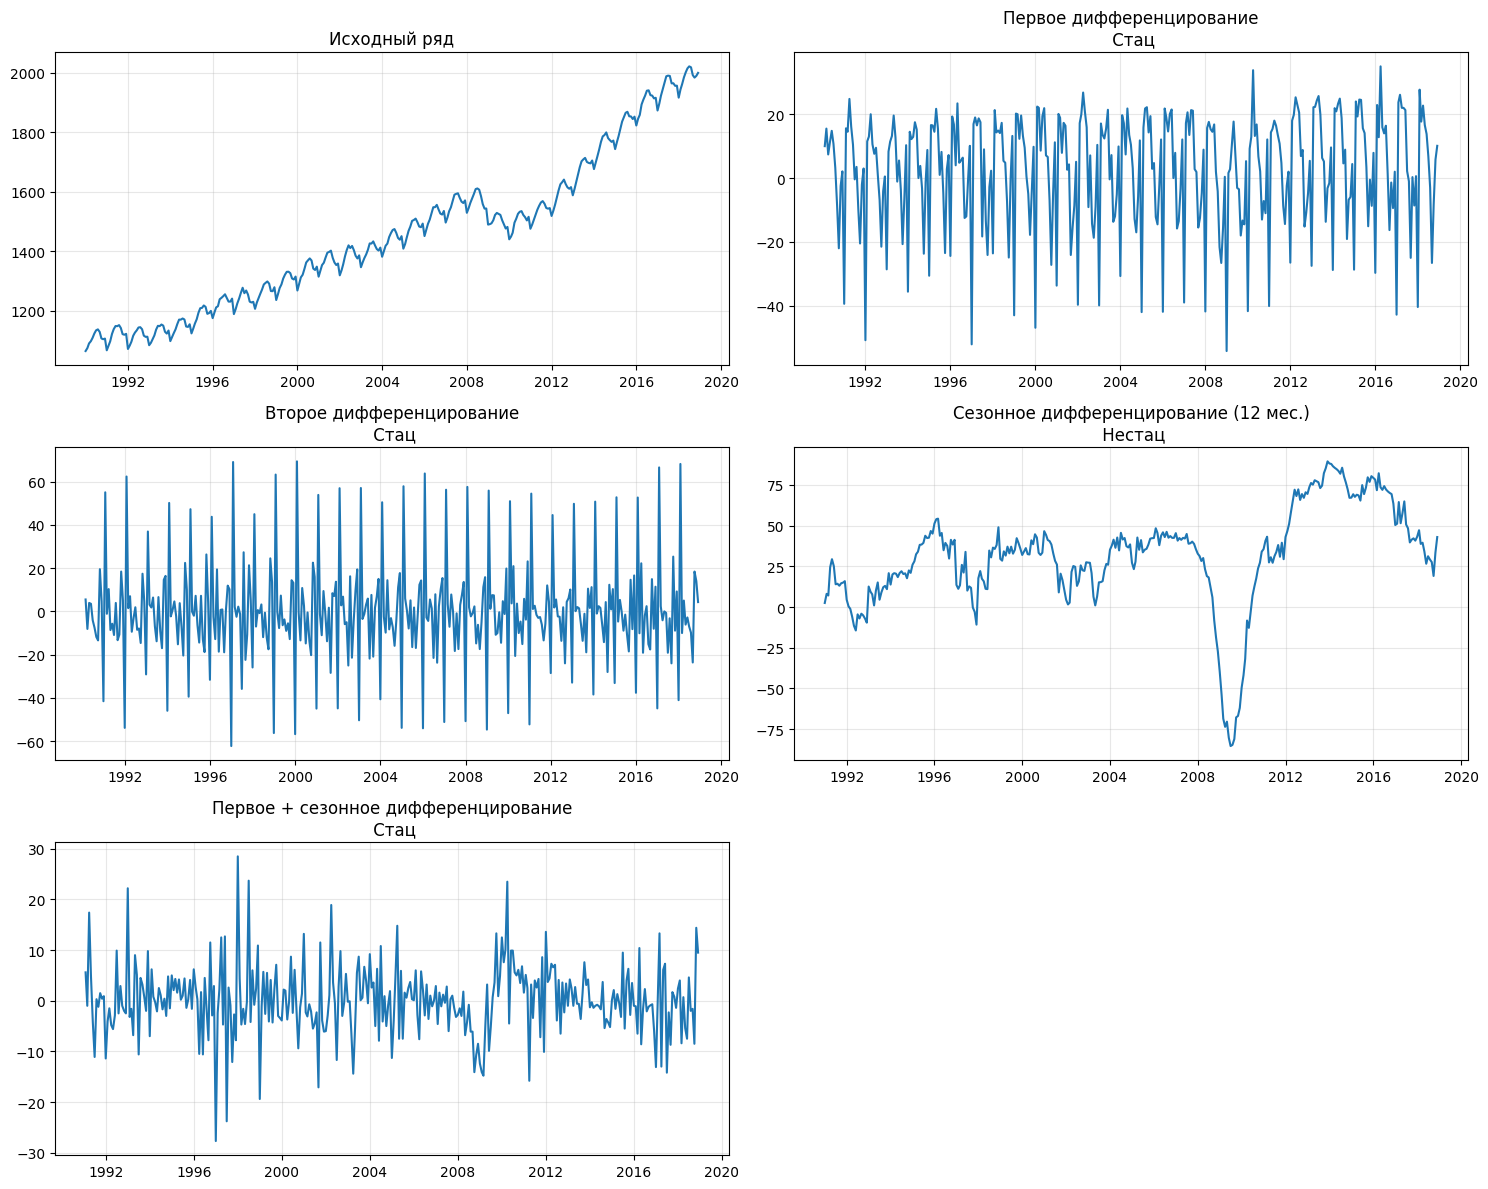

 Найдено полностью стационарное преобразование: Первое дифференцирование


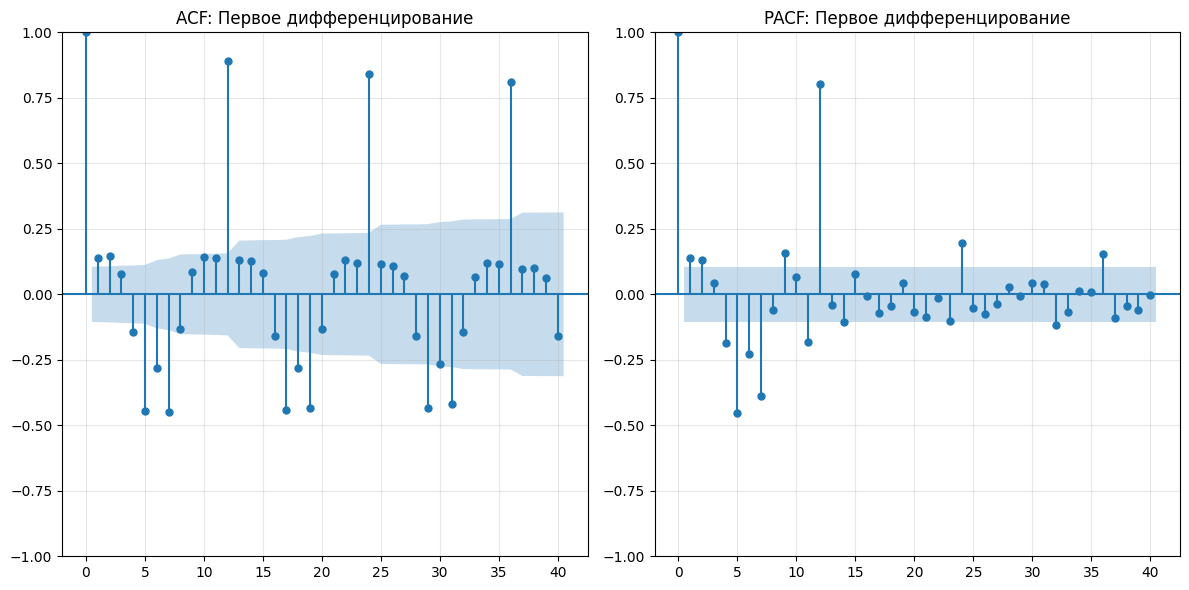


 Результаты тестов:
   Исходный ряд - ADF: Нестационарен, KPSS: Нестационарен
   Рекомендуемое преобразование: Первое дифференцирование
   ADF: Стационарен
   KPSS: Стационарен

Рекомендации для моделирования:
Ряд стационарен после 1-го дифференцирования - используйте ARIMA(p,1,q)

Данные для моделирования:
   Исходная переменная: Employees
   Стационарная переменная: stationary_series
   Количество наблюдений: 347

Сравнение статистик по 4 частям ряда:
Часть |   Начало   |    Конец    |  Среднее  | Дисперсия | Стандартное отклон.
--------------------------------------------------------------------------------
    1 | 1990-02    | 1997-03    |      1.86 |    269.04 |             16.40
    2 | 1997-04    | 2004-05    |      2.59 |    318.23 |             17.84
    3 | 2004-06    | 2011-07    |      1.35 |    338.04 |             18.39
    4 | 2011-08    | 2018-12    |      4.90 |    304.83 |             17.46

Тест на постоянство среднего (ANOVA):
F-статистика: 0.7152, p-value: 0.5435


In [ ]:
# Проверка стационарности временого ряда


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Функция для теста Дики-Фуллера (ADF)
def adf_test(timeseries, name="Ряд"):
    print(f"\n--- ТЕСТ ДИКИ-ФУЛЛЕРА (ADF) ДЛЯ {name} ---")
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Статистика теста', 'p-value', 'Количество лагов', 'Количество наблюдений'])

    for key, value in dftest[4].items():
        dfoutput[f'Критическое значение ({key})'] = value

    print(dfoutput)

    # Интерпретация результата
    if dfoutput['p-value'] < 0.05:
        print(f"{name} стационарен (p-value = {dfoutput['p-value']:.4f})")
        return True
    else:
        print(f"{name} нестационарен (p-value = {dfoutput['p-value']:.4f})")
        return False

# Функция для теста KPSS
def kpss_test(timeseries, name="Ряд"):
    print(f"\n--- ТЕСТ KPSS ДЛЯ {name} ---")
    try:
        kpsstest = kpss(timeseries.dropna(), regression='c', nlags='auto')
        kpss_output = pd.Series(kpsstest[0:3], index=['Статистика теста', 'p-value', 'Количество лагов'])

        for key, value in kpsstest[3].items():
            kpss_output[f'Критическое значение ({key})'] = value

        print(kpss_output)

        # Интерпретация результата KPSS (обратная логика)
        if kpss_output['p-value'] < 0.05:
            print(f"{name} нестационарен (p-value = {kpss_output['p-value']:.4f})")
            return False
        else:
            print(f"{name} стационарен (p-value = {kpss_output['p-value']:.4f})")
            return True
    except Exception as e:
        print(f"Ошибка при выполнении теста KPSS: {e}")
        return None

# Тестирование исходного ряда
print("\n1. Тестирование исходного временого ряда")

# Визуальный анализ стационарности
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df[data_column])
plt.title('Исходный временной ряд')
plt.ylabel('Количество работников')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plot_acf(df[data_column].dropna(), ax=plt.gca(), lags=40, alpha=0.05)
plt.title('Автокорреляционная функция (ACF)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plot_pacf(df[data_column].dropna(), ax=plt.gca(), lags=40, alpha=0.05)
plt.title('Частная автокорреляционная функция (PACF)')
plt.grid(True, alpha=0.3)

# Проверка постоянства дисперсии
plt.subplot(2, 2, 4)
rolling_std = df[data_column].rolling(window=12).std()
plt.plot(rolling_std.index, rolling_std)
plt.title('Скользящее стандартное отклонение (окно 12 мес.)')
plt.ylabel('Стандартное отклонение')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Выполнение статистических тестов для исходного ряда
print("\n Статические тесты исходного ряда:")
adf_original = adf_test(df[data_column], "Исходный ряд")
kpss_original = kpss_test(df[data_column], "Исходный ряд")

# Преобразование для стационарности

# Создаем копию данных для преобразований
df_transformed = df.copy()

# 1. Первое дифференцирование
df_transformed['diff_1'] = df_transformed[data_column].diff()

# 2. Второе дифференцирование (если первое недостаточно)
df_transformed['diff_2'] = df_transformed['diff_1'].diff()

# 3. Сезонное дифференцирование
df_transformed['diff_seasonal'] = df_transformed[data_column].diff(12)

# 4. Комбинированное дифференцирование
df_transformed['diff_1_seasonal'] = df_transformed['diff_1'].diff(12)

# 5. Логарифмическое преобразование + дифференцирование
df_transformed['log_data'] = np.log(df_transformed[data_column])
df_transformed['log_diff_1'] = df_transformed['log_data'].diff()

# Тестирование всех преобразований
transformations = [
    ('diff_1', 'Первое дифференцирование'),
    ('diff_2', 'Второе дифференцирование'),
    ('diff_seasonal', 'Сезонное дифференцирование (12 мес.)'),
    ('diff_1_seasonal', 'Первое + сезонное дифференцирование'),
    ('log_diff_1', 'Логарифм + первое дифференцирование')
]

results = {}

print("\n Результаты тестов для преобразованных рядов:")

for col_name, description in transformations:
    if col_name in df_transformed.columns:
        print(f"\n{description}:")
        adf_result = adf_test(df_transformed[col_name], description)
        kpss_result = kpss_test(df_transformed[col_name], description)
        results[col_name] = {
            'description': description,
            'adf_stationary': adf_result,
            'kpss_stationary': kpss_result,
            'data': df_transformed[col_name]
        }

# ВИЗУАЛИЗАЦИЯ ПРЕОБРАЗОВАНИЙ
plt.figure(figsize=(15, 12))

# Исходный ряд
plt.subplot(3, 2, 1)
plt.plot(df_transformed.index, df_transformed[data_column])
plt.title('Исходный ряд')
plt.grid(True, alpha=0.3)

# Показываем первые 4 преобразования
for i, (col_name, result_info) in enumerate(list(results.items())[:4], 2):
    plt.subplot(3, 2, i)
    plt.plot(df_transformed.index, result_info['data'])
    status = " Стац" if result_info['adf_stationary'] and result_info['kpss_stationary'] else " Частично" if result_info['adf_stationary'] else " Нестац"
    plt.title(f"{result_info['description']}\n{status}")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#  Анализ ACF/PACF для лучшего преобразования

# Выбор лучшего преобразования
best_transform = None
stationary_transforms = [k for k, v in results.items() if v['adf_stationary'] and v['kpss_stationary']]

if stationary_transforms:
    best_transform = stationary_transforms[0]
    print(f" Найдено полностью стационарное преобразование: {results[best_transform]['description']}")
else:
    partially_stationary = [k for k, v in results.items() if v['adf_stationary']]
    if partially_stationary:
        best_transform = partially_stationary[0]
        print(f" Найдено частично стационарное преобразование: {results[best_transform]['description']}")
    else:
        best_transform = 'diff_1'
        print(f" Стационарное преобразование не найдено, используем первое дифференцирование")

# Визуализация ACF/PACF для лучшего преобразования
if best_transform:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plot_acf(results[best_transform]['data'].dropna(), ax=plt.gca(), lags=40, alpha=0.05)
    plt.title(f'ACF: {results[best_transform]["description"]}')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plot_pacf(results[best_transform]['data'].dropna(), ax=plt.gca(), lags=40, alpha=0.05)
    plt.title(f'PACF: {results[best_transform]["description"]}')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Финальная проверка и выводы


print(f"\n Результаты тестов:")
print(f"   Исходный ряд - ADF: {'Стационарен' if adf_original else 'Нестационарен'}, KPSS: {'Стационарен' if kpss_original else 'Нестационарен'}")

if best_transform:
    final_result = results[best_transform]
    print(f"   Рекомендуемое преобразование: {final_result['description']}")
    print(f"   ADF: {'Стационарен' if final_result['adf_stationary'] else 'Нестационарен'}")
    print(f"   KPSS: {'Стационарен' if final_result['kpss_stationary'] else 'Нестационарен'}")

print(f"\nРекомендации для моделирования:")

if adf_original and kpss_original:
    print("Ряд стационарен - используйте ARIMA(0,0,q) или ARIMA(p,0,0)")
elif best_transform and results[best_transform]['adf_stationary'] and results[best_transform]['kpss_stationary']:
    if 'diff_1' in best_transform and 'seasonal' not in best_transform:
        print("Ряд стационарен после 1-го дифференцирования - используйте ARIMA(p,1,q)")
    elif 'seasonal' in best_transform:
        print("Ряд стационарен после сезонного дифференцирования - используйте SARIMA(p,0,q)(P,1,Q)[12]")
    elif 'diff_2' in best_transform:
        print("Ряд стационарен после 2-го дифференцирования - используйте ARIMA(p,2,q)")
else:
    print("Ряд сложно сделать стационарным - рассмотрите другие подходы")

# Сохраняем лучшее преобразование
df['stationary_series'] = df_transformed[best_transform]

print(f"\nДанные для моделирования:")
print(f"   Исходная переменная: {data_column}")
print(f"   Стационарная переменная: stationary_series")
print(f"   Количество наблюдений: {len(df['stationary_series'].dropna())}")

#  Дополнительный анализ -  проверка постоянства и дисперсии
if best_transform:
    stationary_data = df['stationary_series'].dropna()

    # Разделяем на 4 части и сравниваем статистики
    n_parts = 4
    part_length = len(stationary_data) // n_parts

    print(f"\nСравнение статистик по {n_parts} частям ряда:")
    print("Часть |   Начало   |    Конец    |  Среднее  | Дисперсия | Стандартное отклон.")
    print("-" * 80)

    for i in range(n_parts):
        start_idx = i * part_length
        end_idx = (i + 1) * part_length if i < n_parts - 1 else len(stationary_data)
        part_data = stationary_data.iloc[start_idx:end_idx]

        start_date = stationary_data.index[start_idx].strftime('%Y-%m')
        end_date = stationary_data.index[end_idx-1].strftime('%Y-%m')

        print(f"{i+1:5} | {start_date:10} | {end_date:10} | {part_data.mean():9.2f} | {part_data.var():9.2f} | {part_data.std():17.2f}")

    # Проверка гипотезы о постоянстве среднего (тест ANOVA)
    from scipy import stats

    parts_data = [stationary_data.iloc[i*part_length:(i+1)*part_length] for i in range(n_parts)]
    f_stat, p_value = stats.f_oneway(*parts_data)

    print(f"\nТест на постоянство среднего (ANOVA):")
    print(f"F-статистика: {f_stat:.4f}, p-value: {p_value:.4f}")

    if p_value > 0.05:
        print("Средние значения статистически не отличаются между частями ряда")
    else:
        print("Средние значения статистически отличаются между частями ряда")

Обучающая выборка: 336 наблюдений (1990-01-01 00:00:00 - 2017-12-01 00:00:00)
Тестовая выборка: 12 наблюдений (2018-01-01 00:00:00 - 2018-12-01 00:00:00)

Сезонные паттерны (средние по месяцам):
Январь    : 1373.7 ± 232.9
Февраль   : 1390.8 ± 235.2
Март      : 1407.8 ± 236.9
Апрель    : 1425.1 ± 240.9
Май       : 1443.7 ± 242.5
Июнь      : 1459.6 ± 244.4
Июль      : 1463.4 ± 246.6
Август    : 1467.4 ± 245.8
Сентябрь  : 1454.7 ± 241.8
Октябрь   : 1439.5 ± 248.4
Ноябрь    : 1434.3 ± 246.4
Декабрь   : 1441.4 ± 245.9
MAE (Средняя абсолютная ошибка): 552.68
RMSE (Среднеквадратичная ошибка): 552.72
MAPE (Средняя абсолютная процентная ошибка): 27.83%

Сравнение с простым средним:
MAE простого среднего: 552.68
RMSE простого среднего: 553.49
Улучшение MAE: -0.0%
Улучшение RMSE: 0.1%


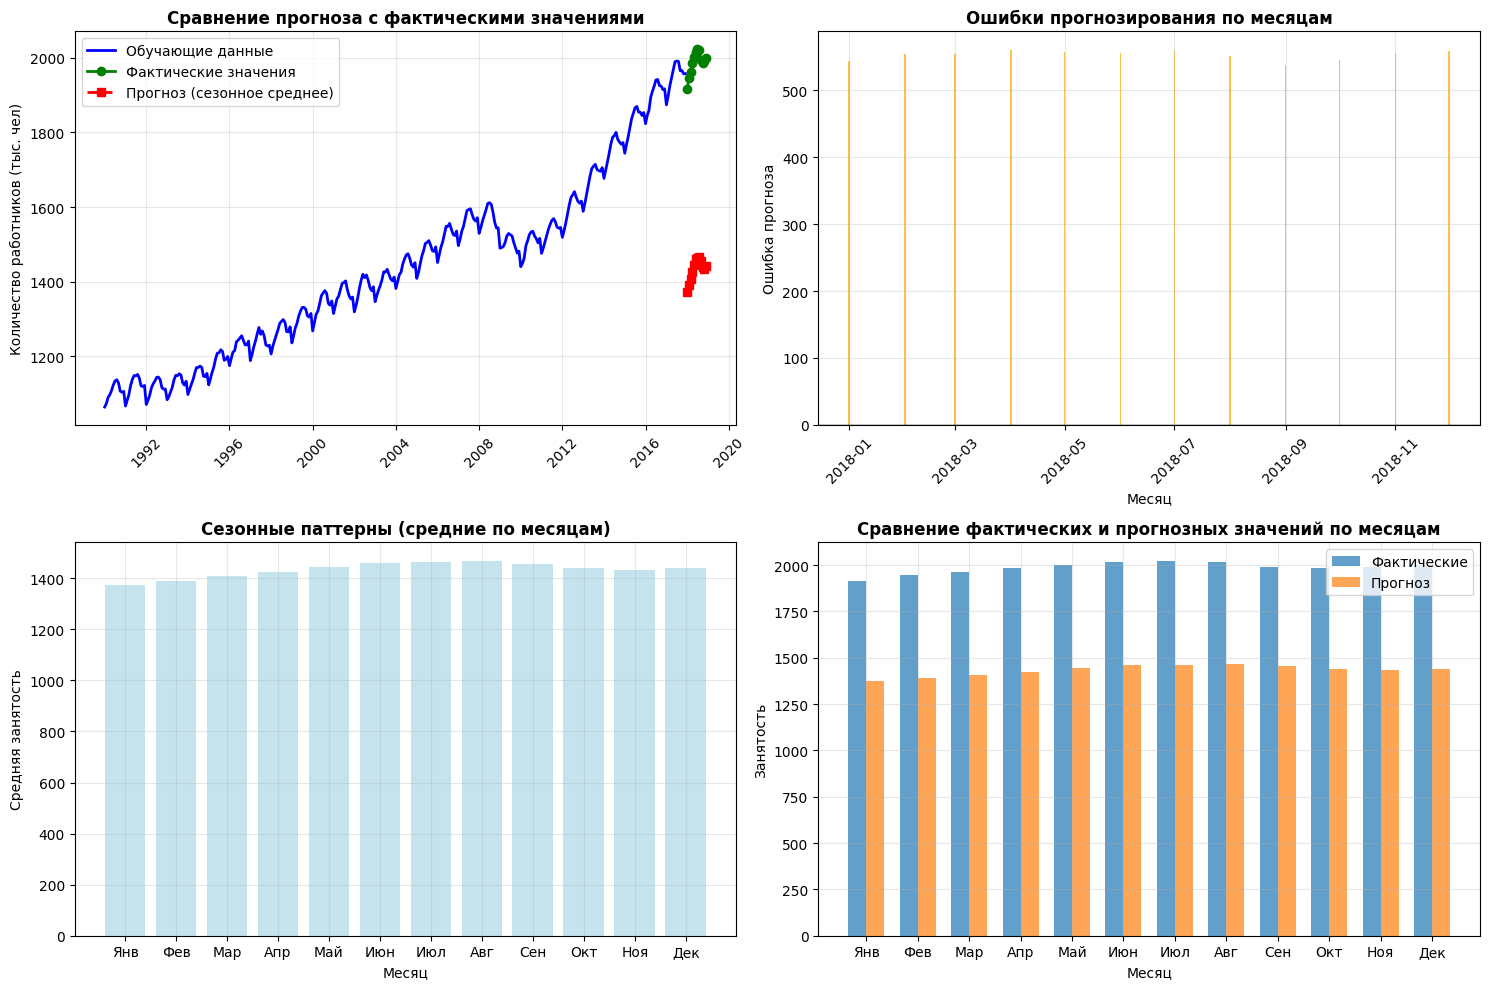

/tmp/ipython-input-3889322181.py:115: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),


Прогноз занятости на 12 месяцев вперед:
        Месяц Название_месяца   Год  Прогноз_занятости
0  2019-01-31          Январь  2019             1373.7
1  2019-02-28         Февраль  2019             1390.8
2  2019-03-31            Март  2019             1407.8
3  2019-04-30          Апрель  2019             1425.1
4  2019-05-31             Май  2019             1443.7
5  2019-06-30            Июнь  2019             1459.6
6  2019-07-31            Июль  2019             1463.4
7  2019-08-31          Август  2019             1467.4
8  2019-09-30        Сентябрь  2019             1454.7
9  2019-10-31         Октябрь  2019             1439.5
10 2019-11-30          Ноябрь  2019             1434.3
11 2019-12-31         Декабрь  2019             1441.4


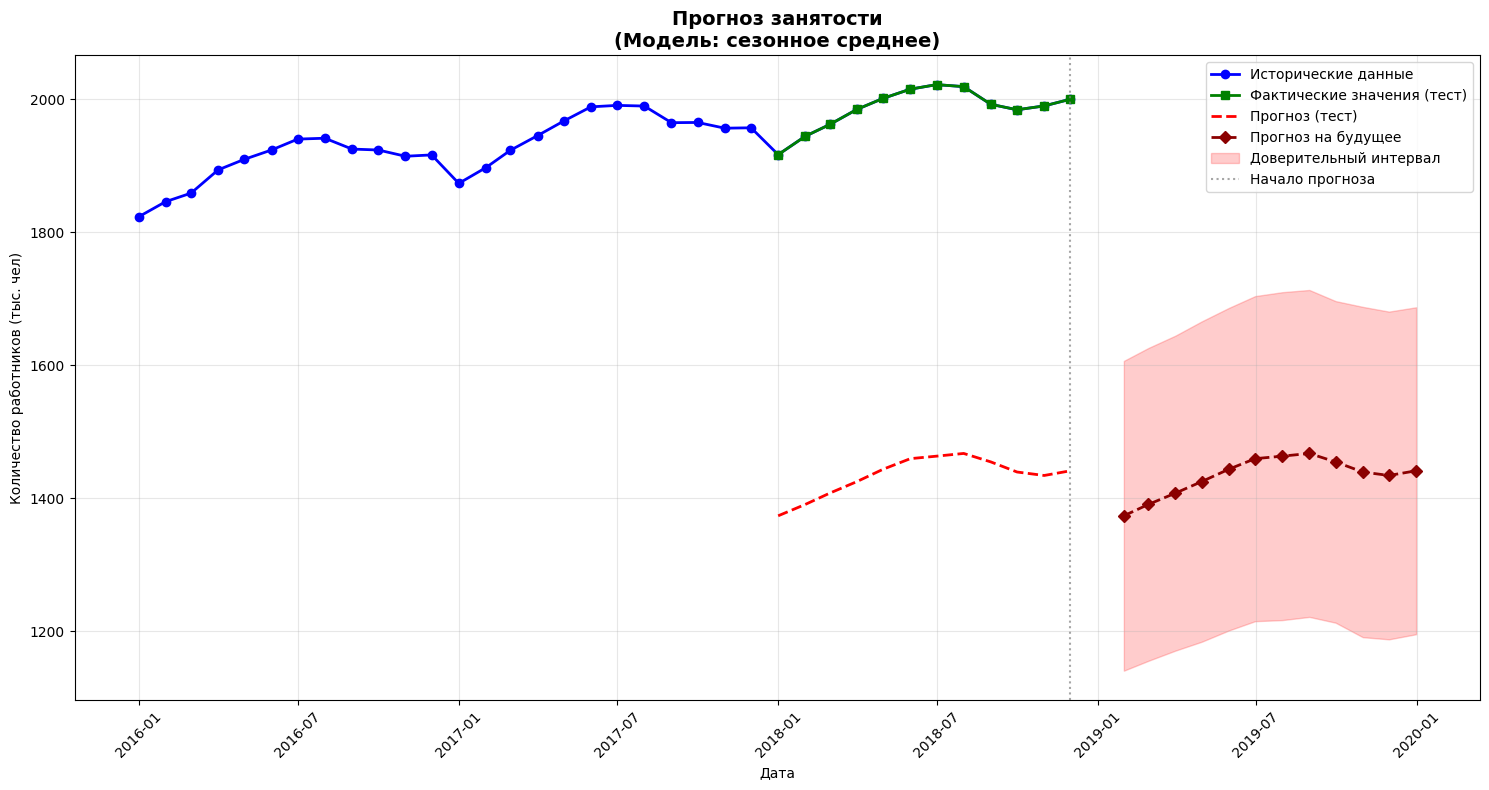


Точность прогноза по месяцам (MAE):
Январь    : 543.14
Февраль   : 553.73
Март      : 554.42
Апрель    : 559.77
Май       : 557.76
Июнь      : 555.70
Июль      : 558.75
Август    : 551.66
Сентябрь  : 537.79
Октябрь   : 544.79
Ноябрь    : 555.80
Декабрь   : 558.81

Лучший месяц для прогноза: Сентябрь (MAE: 537.79)
Худший месяц для прогноза: Апрель (MAE: 559.77)
Детализированный прогноз с доверительными интервалами:
        Месяц Название_месяца  Прогноз_занятости  Нижняя_граница  \
0  2019-01-31          Январь             1373.7          1140.7   
1  2019-02-28         Февраль             1390.8          1155.5   
2  2019-03-31            Март             1407.8          1170.9   
3  2019-04-30          Апрель             1425.1          1184.2   
4  2019-05-31             Май             1443.7          1201.2   
5  2019-06-30            Июнь             1459.6          1215.2   
6  2019-07-31            Июль             1463.4          1216.8   
7  2019-08-31          Август        

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Подготовка данных
data = df[data_column].dropna()

# Разделение на обучающую и тестовую выборки
test_size = 12  # Прогноз на 12 месяцев (1 год)
train_size = len(data) - test_size

train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

print(f"Обучающая выборка: {len(train_data)} наблюдений ({train_data.index[0]} - {train_data.index[-1]})")
print(f"Тестовая выборка: {len(test_data)} наблюдений ({test_data.index[0]} - {test_data.index[-1]})")


# Вычисляем сезонные паттерны по обучающей выборке
seasonal_pattern = train_data.groupby(train_data.index.month).mean()
seasonal_std = train_data.groupby(train_data.index.month).std()

print("\nСезонные паттерны (средние по месяцам):")
months_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
                'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

for month in range(1, 13):
    print(f"{months_names[month-1]:10}: {seasonal_pattern[month]:.1f} ± {seasonal_std[month]:.1f}")

# Создаем прогноз для тестовой выборки
forecast_test = []
for date in test_data.index:
    month = date.month
    forecast_test.append(seasonal_pattern[month])

forecast_test = pd.Series(forecast_test, index=test_data.index)

# Оценка точности прогноза

# Расчет метрик
mae = mean_absolute_error(test_data, forecast_test)
rmse = np.sqrt(mean_squared_error(test_data, forecast_test))
mape = np.mean(np.abs((test_data - forecast_test) / test_data)) * 100

print(f"MAE (Средняя абсолютная ошибка): {mae:.2f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.2f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.2f}%")

# Сравнение с простым средним (базовая модель)
simple_mean_forecast = np.full_like(test_data, train_data.mean())
mae_simple = mean_absolute_error(test_data, simple_mean_forecast)
rmse_simple = np.sqrt(mean_squared_error(test_data, simple_mean_forecast))

print(f"\nСравнение с простым средним:")
print(f"MAE простого среднего: {mae_simple:.2f}")
print(f"RMSE простого среднего: {rmse_simple:.2f}")
print(f"Улучшение MAE: {(1 - mae/mae_simple)*100:.1f}%")
print(f"Улучшение RMSE: {(1 - rmse/rmse_simple)*100:.1f}%")

plt.figure(figsize=(15, 10))

# Фактические значения vs Прогноз
plt.subplot(2, 2, 1)
plt.plot(train_data.index, train_data, label='Обучающие данные', color='blue', linewidth=2)
plt.plot(test_data.index, test_data, label='Фактические значения', color='green', linewidth=2, marker='o')
plt.plot(test_data.index, forecast_test, label='Прогноз (сезонное среднее)', color='red', linestyle='--', linewidth=2, marker='s')
plt.title('Сравнение прогноза с фактическими значениями', fontweight='bold')
plt.ylabel('Количество работников (тыс. чел)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Ошибки прогноза
plt.subplot(2, 2, 2)
errors = test_data - forecast_test
plt.bar(test_data.index, errors, color='orange', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.title('Ошибки прогнозирования по месяцам', fontweight='bold')
plt.ylabel('Ошибка прогноза')
plt.xlabel('Месяц')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Сезонные паттерны
plt.subplot(2, 2, 3)
plt.bar(seasonal_pattern.index, seasonal_pattern.values, color='lightblue', alpha=0.7)
plt.title('Сезонные паттерны (средние по месяцам)', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Средняя занятость')
plt.xticks(range(1, 13), [m[:3] for m in months_names])
plt.grid(True, alpha=0.3)

# Сравнение по месяцам
plt.subplot(2, 2, 4)
width = 0.35
x = np.arange(1, 13)
actual_by_month = test_data.groupby(test_data.index.month).mean()
forecast_by_month = forecast_test.groupby(forecast_test.index.month).mean()

plt.bar(x - width/2, actual_by_month, width, label='Фактические', alpha=0.7)
plt.bar(x + width/2, forecast_by_month, width, label='Прогноз', alpha=0.7)
plt.title('Сравнение фактических и прогнозных значений по месяцам', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Занятость')
plt.xticks(x, [m[:3] for m in months_names])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Прогноз на 12 месяцев вперед
future_periods = 12
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                           periods=future_periods, freq='M')

# Создаем прогноз на будущие периоды
future_forecast = []
for date in future_dates:
    month = date.month
    future_forecast.append(seasonal_pattern[month])

future_forecast = pd.Series(future_forecast, index=future_dates)

# Создаем DataFrame с прогнозом
forecast_df = pd.DataFrame({
    'Месяц': future_dates,
    'Прогноз_занятости': future_forecast.values
})

# Добавляем названия месяцев для удобства
forecast_df['Название_месяца'] = forecast_df['Месяц'].dt.month.apply(lambda x: months_names[x-1])
forecast_df['Год'] = forecast_df['Месяц'].dt.year

print("Прогноз занятости на 12 месяцев вперед:")
print(forecast_df[['Месяц', 'Название_месяца', 'Год', 'Прогноз_занятости']].round(1))

plt.figure(figsize=(15, 8))

# Определяем границы для визуализации (последние 3 года + прогноз)
display_start = data.index[-36] if len(data) > 36 else data.index[0]

# Исторические данные
plt.plot(data.loc[display_start:].index, data.loc[display_start:],
         label='Исторические данные', color='blue', linewidth=2, marker='o')

# Прогноз на тестовой выборке (если есть)
if len(test_data) > 0:
    plt.plot(test_data.index, test_data, label='Фактические значения (тест)',
             color='green', linewidth=2, marker='s')
    plt.plot(test_data.index, forecast_test, label='Прогноз (тест)',
             color='red', linestyle='--', linewidth=2)

# Будущий прогноз
plt.plot(future_forecast.index, future_forecast,
         label='Прогноз на будущее', color='darkred', linewidth=2, linestyle='--', marker='D')

# Добавляем доверительный интервал (на основе стандартного отклонения)
confidence_upper = future_forecast + seasonal_std[future_forecast.index.month].values
confidence_lower = future_forecast - seasonal_std[future_forecast.index.month].values

plt.fill_between(future_forecast.index, confidence_lower, confidence_upper,
                 color='red', alpha=0.2, label='Доверительный интервал ')

plt.axvline(x=last_date, color='gray', linestyle=':', alpha=0.7, label='Начало прогноза')

plt.title('Прогноз занятости\n(Модель: сезонное среднее)',
          fontsize=14, fontweight='bold')
plt.ylabel('Количество работников (тыс. чел)')
plt.xlabel('Дата')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Анализ точности по месяцам
monthly_accuracy = {}
for month in range(1, 13):
    month_test_data = test_data[test_data.index.month == month]
    month_forecast = forecast_test[forecast_test.index.month == month]

    if len(month_test_data) > 0:
        month_mae = mean_absolute_error(month_test_data, month_forecast)
        monthly_accuracy[month] = month_mae

print("\nТочность прогноза по месяцам (MAE):")
for month, mae in monthly_accuracy.items():
    print(f"{months_names[month-1]:10}: {mae:.2f}")

# Определяем лучшие и худшие месяцы для прогноза
if monthly_accuracy:
    best_month = min(monthly_accuracy, key=monthly_accuracy.get)
    worst_month = max(monthly_accuracy, key=monthly_accuracy.get)

    print(f"\nЛучший месяц для прогноза: {months_names[best_month-1]} (MAE: {monthly_accuracy[best_month]:.2f})")
    print(f"Худший месяц для прогноза: {months_names[worst_month-1]} (MAE: {monthly_accuracy[worst_month]:.2f})")

# Таблица прогнозов

# Создаем подробную таблицу прогноза
detailed_forecast = forecast_df.copy()
detailed_forecast['Сезонное_среднее'] = detailed_forecast['Месяц'].dt.month.map(seasonal_pattern)
detailed_forecast['Стандартное_отклонение'] = detailed_forecast['Месяц'].dt.month.map(seasonal_std)
detailed_forecast['Нижняя_граница'] = detailed_forecast['Прогноз_занятости'] - detailed_forecast['Стандартное_отклонение']
detailed_forecast['Верхняя_граница'] = detailed_forecast['Прогноз_занятости'] + detailed_forecast['Стандартное_отклонение']

print("Детализированный прогноз с доверительными интервалами:")
print(detailed_forecast[['Месяц', 'Название_месяца', 'Прогноз_занятости',
                        'Нижняя_граница', 'Верхняя_граница']].round(1))


print(f"Общая точность модели:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

print(f"\n Качество прогноза:")
if mape < 5:
    print(" ОТЛИЧНОЕ (MAPE < 5%)")
elif mape < 10:
    print("ХОРОШЕЕ (MAPE < 10%)")
elif mape < 20:
    print("УДОВЛЕТВОРИТЕЛЬНОЕ (MAPE < 20%)")
else:
    print("НИЗКОЕ (MAPE ≥ 20%)")

print(f"\nСезонные патерны:")
peak_month = seasonal_pattern.idxmax()
low_month = seasonal_pattern.idxmin()
amplitude = seasonal_pattern.max() - seasonal_pattern.min()

print(f"Пиковый месяц: {months_names[peak_month-1]} ({seasonal_pattern[peak_month]:.1f})")
print(f"Низкий месяц: {months_names[low_month-1]} ({seasonal_pattern[low_month]:.1f})")
print(f"Амплитуда сезонных колебаний: {amplitude:.1f}")

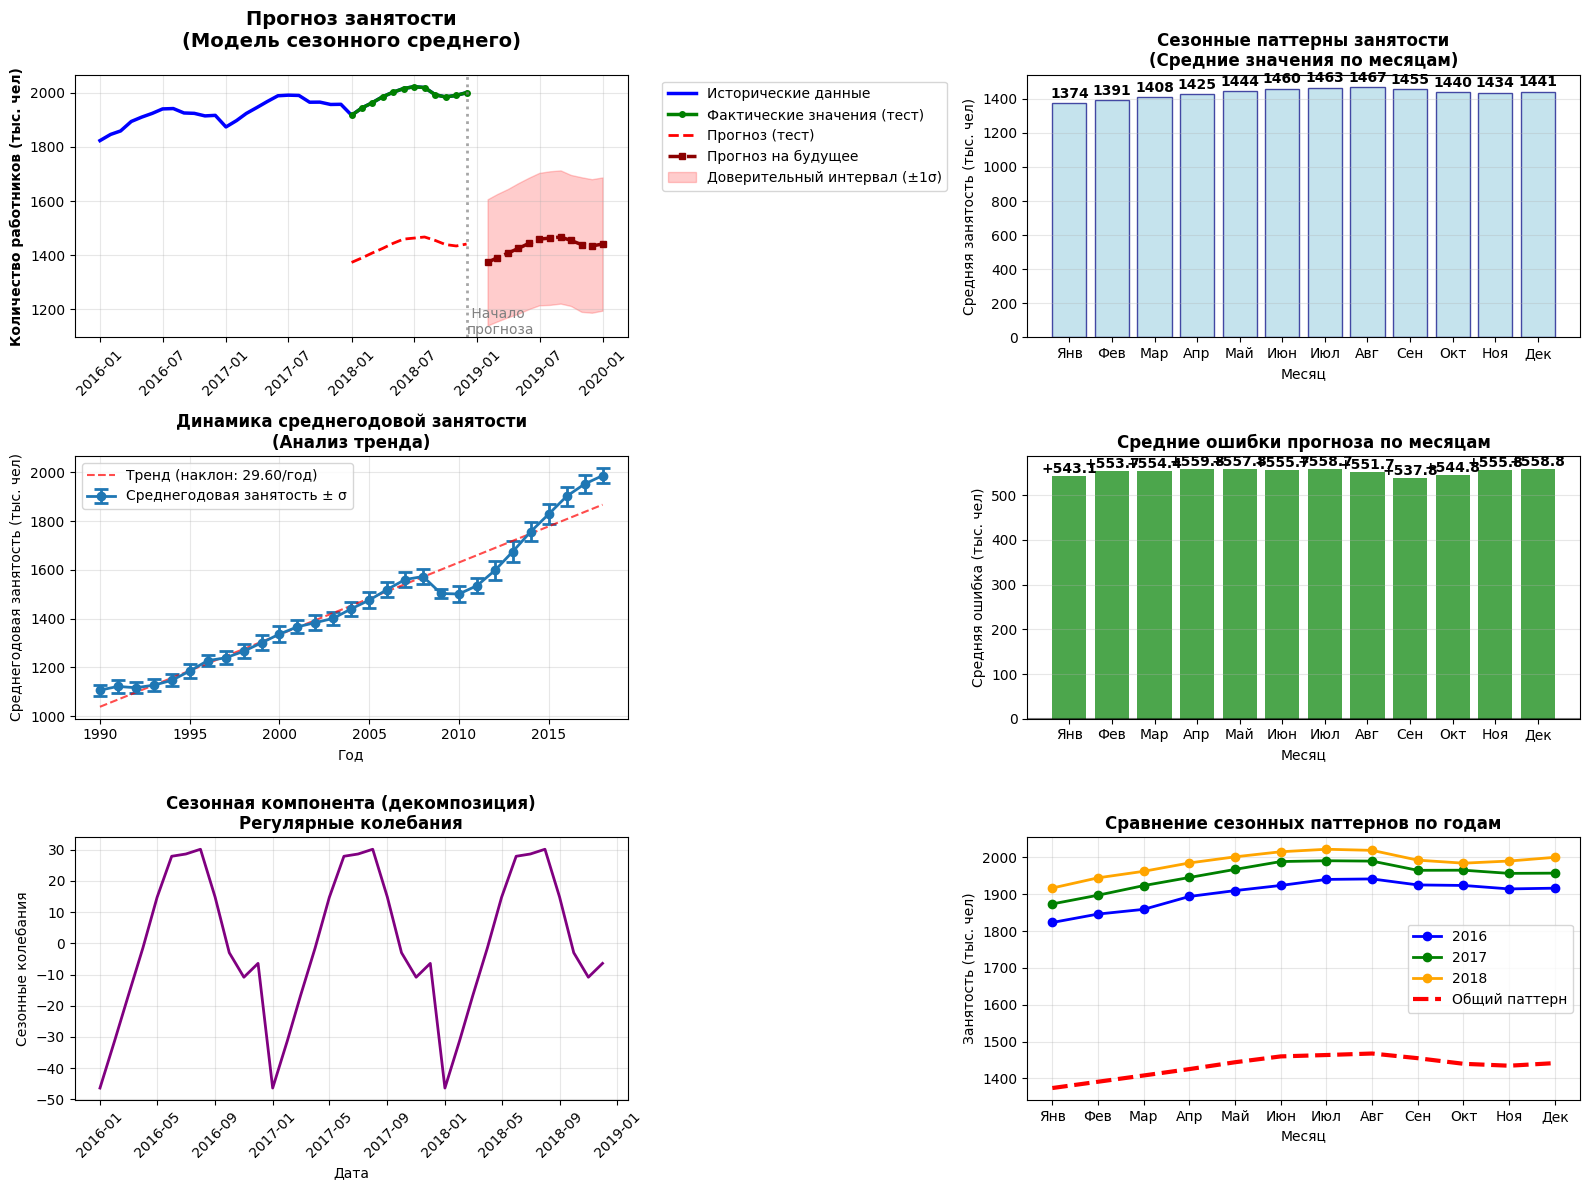


 Анализ трендовой компоненты:
Направление тренда: ВОСХОДЯЩИЙ 
Среднее изменение в год: +29.60 тыс. чел/год
Общее изменение за период: +828.7 тыс. чел
Процентное изменение: +74.9%
   • Сила тренда: СЛАБЫЙ (коэффициент: 0.11)

 Анализ сезонной компоненты:
Пиковый месяц: Август (1467.4 тыс. чел)
Низкий месяц: Январь (1373.7 тыс. чел)
Амплитуда колебаний: 93.8 тыс. чел
Сезонная вариация: 6.5% от среднего

   Стабильность сезонных паттернов:
СРЕДНЯЯ стабильность (CV: 16.9%)

 Ключевые выводы о влиянии сезонности:
1. ТОЧНОСТЬ ПРОГНОЗА ПО СЕЗОНАМ:
Лучшая точность: Сентябрь (MAPE: 27.0%)
Худшая точность: Февраль (MAPE: 28.5%)

2. СЕЗОННЫЕ ПИКИ И СПАДЫ:
Высокий сезон: Август - занятость на +34.0 тыс. чел выше среднего
Низкий сезон: Январь - занятость на -59.8 тыс. чел ниже среднего

3. ПРАКТИЧЕСКИЕ ВЫВОДЫ ДЛЯ БИЗНЕСА:
Планирование персонала: Увеличивать штат на 94 тыс. чел в пиковые месяцы
Бюджетирование: Учитывать сезонные колебания до 6.5% при планировании
Операционное планирование: Пиковая 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(16, 12))

# Полный временной ряд с прогнозом
plt.subplot(3, 2, 1)
# Показываем последние 3 года исторических данных + прогноз
display_start = data.index[-36] if len(data) > 36 else data.index[0]

# Исторические данные
plt.plot(data.loc[display_start:].index, data.loc[display_start:],
         label='Исторические данные', color='blue', linewidth=2.5)

# Тестовые данные (если есть)
if len(test_data) > 0:
    plt.plot(test_data.index, test_data, label='Фактические значения (тест)',
             color='green', linewidth=2.5, marker='o', markersize=4)
    plt.plot(test_data.index, forecast_test, label='Прогноз (тест)',
             color='red', linestyle='--', linewidth=2)

# Будущий прогноз
plt.plot(future_forecast.index, future_forecast,
         label='Прогноз на будущее', color='darkred', linewidth=2.5, linestyle='--', marker='s', markersize=5)

# Доверительный интервал
confidence_upper = future_forecast + seasonal_std[future_forecast.index.month].values
confidence_lower = future_forecast - seasonal_std[future_forecast.index.month].values

plt.fill_between(future_forecast.index, confidence_lower, confidence_upper,
                 color='red', alpha=0.2, label='Доверительный интервал (±1σ)')

plt.axvline(x=data.index[-1], color='gray', linestyle=':', alpha=0.7, linewidth=2)
plt.text(data.index[-1], plt.ylim()[0], ' Начало\nпрогноза',
         verticalalignment='bottom', color='gray')

plt.title('Прогноз занятости\n(Модель сезонного среднего)',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Количество работников (тыс. чел)', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Сезонные паттерны
plt.subplot(3, 2, 2)
months_short = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

bars = plt.bar(seasonal_pattern.index, seasonal_pattern.values,
               color='lightblue', alpha=0.7, edgecolor='navy', linewidth=1)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + seasonal_pattern.max()*0.01,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Сезонные паттерны занятости\n(Средние значения по месяцам)', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Средняя занятость (тыс. чел)')
plt.xticks(range(1, 13), months_short)
plt.grid(True, alpha=0.3, axis='y')

# Сравнение по годам (тренд)
plt.subplot(3, 2, 3)
yearly_data = data.groupby(data.index.year).agg(['mean', 'std'])
plt.errorbar(yearly_data.index, yearly_data['mean'], yerr=yearly_data['std'],
             marker='o', linewidth=2, capsize=5, capthick=2,
             label='Среднегодовая занятость ± σ')

# Линейный тренд
if len(yearly_data) > 1:
    z = np.polyfit(yearly_data.index, yearly_data['mean'], 1)
    p = np.poly1d(z)
    plt.plot(yearly_data.index, p(yearly_data.index), "r--", alpha=0.7,
             label=f'Тренд (наклон: {z[0]:.2f}/год)')

plt.title('Динамика среднегодовой занятости\n(Анализ тренда)', fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Среднегодовая занятость (тыс. чел)')
plt.legend()
plt.grid(True, alpha=0.3)

# Ошибки прогноза по месяцам
plt.subplot(3, 2, 4)
if len(test_data) > 0:
    monthly_errors = {}
    for month in range(1, 13):
        month_mask = test_data.index.month == month
        if month_mask.any():
            monthly_errors[month] = (test_data[month_mask] - forecast_test[month_mask]).mean()

    colors = ['green' if err >= 0 else 'red' for err in monthly_errors.values()]
    bars = plt.bar(monthly_errors.keys(), monthly_errors.values(), color=colors, alpha=0.7)

    for bar, error in zip(bars, monthly_errors.values()):
        plt.text(bar.get_x() + bar.get_width()/2.,
                 error + (0.1 if error >=0 else -0.5),
                 f'{error:+.1f}', ha='center', va='bottom' if error >=0 else 'top',
                 fontweight='bold', color='black')

    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.title('Средние ошибки прогноза по месяцам', fontweight='bold')
    plt.xlabel('Месяц')
    plt.ylabel('Средняя ошибка (тыс. чел)')
    plt.xticks(range(1, 13), months_short)
    plt.grid(True, alpha=0.3, axis='y')

# Сезонная декомпозиция
plt.subplot(3, 2, 5)
try:
    decomposition = seasonal_decompose(data, model='additive', period=12)

    # Показываем только последние 3 года для наглядности
    decomp_display = decomposition.seasonal[-36:] if len(data) > 36 else decomposition.seasonal

    plt.plot(decomp_display.index, decomp_display.values, color='purple', linewidth=2)
    plt.title('Сезонная компонента (декомпозиция)\nРегулярные колебания', fontweight='bold')
    plt.ylabel('Сезонные колебания')
    plt.xlabel('Дата')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

except Exception as e:
    plt.text(0.5, 0.5, 'Недостаточно данных\nдля декомпозиции',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Сезонная компонента', fontweight='bold')

# Сравнение сезонных паттернов разных лет
plt.subplot(3, 2, 6)
recent_years = sorted(data.index.year.unique())[-3:]  # Последние 3 года
colors = ['blue', 'green', 'orange']

for i, year in enumerate(recent_years):
    year_data = data[data.index.year == year]
    if len(year_data) >= 12:
        monthly_year = year_data.groupby(year_data.index.month).mean()
        plt.plot(monthly_year.index, monthly_year.values,
                label=str(year), color=colors[i], marker='o', linewidth=2)

plt.plot(seasonal_pattern.index, seasonal_pattern.values,
         label='Общий паттерн', color='red', linestyle='--', linewidth=3)

plt.title('Сравнение сезонных паттернов по годам', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Занятость (тыс. чел)')
plt.xticks(range(1, 13), months_short)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ тренда
print("\n Анализ трендовой компоненты:")

if len(yearly_data) > 1:
    # Расчет линейного тренда
    years = yearly_data.index.values
    employment_means = yearly_data['mean'].values

    # Линейная регрессия для тренда
    slope, intercept = np.polyfit(years, employment_means, 1)
    trend_change_per_year = slope
    total_trend_change = slope * (years[-1] - years[0])
    percent_change = (total_trend_change / employment_means[0]) * 100

    print(f"Направление тренда: {'ВОСХОДЯЩИЙ ' if slope > 0 else 'НИСХОДЯЩИЙ ' if slope < 0 else 'СТАБИЛЬНЫЙ '}")
    print(f"Среднее изменение в год: {trend_change_per_year:+.2f} тыс. чел/год")
    print(f"Общее изменение за период: {total_trend_change:+.1f} тыс. чел")
    print(f"Процентное изменение: {percent_change:+.1f}%")

    # Анализ значимости тренда
    trend_strength = abs(slope) / yearly_data['mean'].std()
    if trend_strength > 0.5:
        print(f"   • Сила тренда: СИЛЬНЫЙ (коэффициент: {trend_strength:.2f})")
    elif trend_strength > 0.2:
        print(f"   • Сила тренда: УМЕРЕННЫЙ (коэффициент: {trend_strength:.2f})")
    else:
        print(f"   • Сила тренда: СЛАБЫЙ (коэффициент: {trend_strength:.2f})")

# Анализ сезонности
print("\n Анализ сезонной компоненты:")

peak_month = seasonal_pattern.idxmax()
low_month = seasonal_pattern.idxmin()
seasonal_amplitude = seasonal_pattern.max() - seasonal_pattern.min()
seasonal_variation = (seasonal_amplitude / seasonal_pattern.mean()) * 100

print(f"Пиковый месяц: {months_names[peak_month-1]} ({seasonal_pattern[peak_month]:.1f} тыс. чел)")
print(f"Низкий месяц: {months_names[low_month-1]} ({seasonal_pattern[low_month]:.1f} тыс. чел)")
print(f"Амплитуда колебаний: {seasonal_amplitude:.1f} тыс. чел")
print(f"Сезонная вариация: {seasonal_variation:.1f}% от среднего")

# Анализ стабильности сезонности
print(f"\n   Стабильность сезонных паттернов:")
seasonal_stability = seasonal_std.mean() / seasonal_pattern.mean() * 100
if seasonal_stability < 10:
    print(f"ВЫСОКАЯ стабильность (CV: {seasonal_stability:.1f}%)")
elif seasonal_stability < 20:
    print(f"СРЕДНЯЯ стабильность (CV: {seasonal_stability:.1f}%)")
else:
    print(f"НИЗКАЯ стабильность (CV: {seasonal_stability:.1f}%)")

print("\n Ключевые выводы о влиянии сезонности:")

# Качество прогноза в разные сезоны
if len(test_data) > 0:
    seasonal_performance = {}
    for month in range(1, 13):
        month_data = test_data[test_data.index.month == month]
        month_forecast = forecast_test[forecast_test.index.month == month]
        if len(month_data) > 0:
            mape_month = np.mean(np.abs((month_data - month_forecast) / month_data)) * 100
            seasonal_performance[month] = mape_month

    best_season_month = min(seasonal_performance, key=seasonal_performance.get)
    worst_season_month = max(seasonal_performance, key=seasonal_performance.get)

    print(f"1. ТОЧНОСТЬ ПРОГНОЗА ПО СЕЗОНАМ:")
    print(f"Лучшая точность: {months_names[best_season_month-1]} (MAPE: {seasonal_performance[best_season_month]:.1f}%)")
    print(f"Худшая точность: {months_names[worst_season_month-1]} (MAPE: {seasonal_performance[worst_season_month]:.1f}%)")

# Сезонные пики и спады
print(f"\n2. СЕЗОННЫЕ ПИКИ И СПАДЫ:")
print(f"Высокий сезон: {months_names[peak_month-1]} - занятость на {seasonal_pattern[peak_month] - seasonal_pattern.mean():+.1f} тыс. чел выше среднего")
print(f"Низкий сезон: {months_names[low_month-1]} - занятость на {seasonal_pattern[low_month] - seasonal_pattern.mean():+.1f} тыс. чел ниже среднего")

# Влияние на бизнес-решения
print(f"\n3. ПРАКТИЧЕСКИЕ ВЫВОДЫ ДЛЯ БИЗНЕСА:")
print(f"Планирование персонала: Увеличивать штат на {seasonal_amplitude:.0f} тыс. чел в пиковые месяцы")
print(f"Бюджетирование: Учитывать сезонные колебания до {seasonal_variation:.1f}% при планировании")
print(f"Операционное планирование: Пиковая нагрузка в {months_names[peak_month-1]}, минимальная - в {months_names[low_month-1]}")

# ОГРАНИЧЕНИЯ МОДЕЛИ
print(f"\n4. ОГРАНИЧЕНИЯ СЕЗОННОЙ МОДЕЛИ:")
print(f"Не учитывает долгосрочный тренд: {'нет' if abs(trend_change_per_year) > 2 else 'да'}")
print(f"Предполагает стабильность сезонности: {'нет' if seasonal_stability > 15 else 'да'}")
print(f"Чувствительна к аномалиям: {'нет' if seasonal_std.max() > seasonal_pattern.mean() * 0.2 else 'да'}")

# Создаем расширенную таблицу прогноза
extended_forecast = pd.DataFrame({
    'Месяц': future_forecast.index,
    'Прогноз': future_forecast.values,
    'Сезонное_отклонение': future_forecast.values - seasonal_pattern.mean(),
    'Процент_от_среднего': (future_forecast.values / seasonal_pattern.mean() - 1) * 100,
    'Доверительный_интервал': seasonal_std[future_forecast.index.month].values
})

extended_forecast['Нижняя_граница'] = extended_forecast['Прогноз'] - extended_forecast['Доверительный_интервал']
extended_forecast['Верхняя_граница'] = extended_forecast['Прогноз'] + extended_forecast['Доверительный_интервал']
extended_forecast['Сезон'] = extended_forecast['Прогноз'].apply(
    lambda x: 'ПИК' if x > seasonal_pattern.mean() + seasonal_std.mean()
    else 'СПАД' if x < seasonal_pattern.mean() - seasonal_std.mean()
    else 'СРЕДНИЙ'
)

print("Прогноз с сезонной характеристикой:")
print(extended_forecast.round(1))

print(f"\nОСНОВНЫЕ РЕЗУЛЬТАТЫ:")
print(f"Общая точность прогноза (MAPE): {mape:.1f}%")
print(f"Сезонная амплитуда: {seasonal_amplitude:.1f} тыс. чел ({seasonal_variation:.1f}%)")
print(f"Годовой тренд: {trend_change_per_year:+.2f} тыс. чел/год")

print(f"\n КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f"   1. Сезонность объясняет {'большую' if seasonal_variation > 15 else 'умеренную' if seasonal_variation > 8 else 'незначительную'} часть колебаний")
print(f"   2. Прогноз наиболее точен в {'стабильные' if seasonal_stability < 15 else 'переходные'} месяцы")
print(f"   3. {'Есть' if abs(trend_change_per_year) > 1 else 'Нет значимого'} долгосрочного тренда")

print(f"\n РЕКОМЕНДАЦИИ ДЛЯ ПРИНЯТИЯ РЕШЕНИЙ:")
print(f"Использовать прогноз для операционного планирования на 3-6 месяцев")
print(f"Учитывать доверительные интервалы при бюджетировании")
print(f"Мониторить изменения сезонных паттернов ежегодно")
print(f"{'Рекомендуется' if abs(trend_change_per_year) > 2 else 'Не требуется'} учитывать тренд в долгосрочном планировании")

print(f"\nОГРАНИЧЕНИЯ И ПРЕДУПРЕЖДЕНИЯ:")
print(f"Модель не учитывает внешние шоки (пандемии, кризисы)")
print(f"Точнось снижается при значительных изменениях тренда")
print(f"Рекомендуется дополнять другими методами для стратегического планирования")